# Question 1

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def dRdt(R, S, X, k1 = 2, k2 = 2):
    return k1 * S - k2 * X * R

def dXdt(X, S, R, k3 = 1, k4 = 1):
    return k3 * S - k4 * X

def equilibriumX(k3, k4, S):
    return k3 * S / k4

def equilibriumR(k1, k2, S, X):
    return (k1 * S) / (k2 * X)

def system(y, t, S, k1, k2, k3, k4):
    R, X = y
    
    return np.array([dRdt(R, S, X, k1, k2), dXdt(X, S, R, k3, k4)])

In [3]:
k1 = k2 = 2
k3 = k4 = 1

### 1a

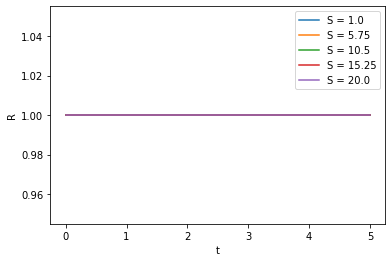

In [4]:
t_values = np.linspace(0, 5, 50)

for S in np.linspace(1, 20, 5):
    X = equilibriumX(k3, k4, S)
    R = equilibriumR(k1, k2, S, X)
    
    rate = odeint(system, y0 = [R, X], t = t_values, args = (S, k1, k2, k3, k4)).transpose()[0]
    plt.plot(t_values, rate, label=f"S = {S}")
    
plt.xlabel("t")
plt.ylabel("R")
plt.legend()
plt.show()

### 1b

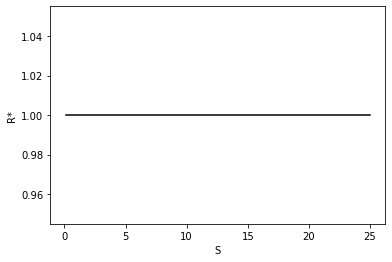

In [9]:
S_values = np.linspace(0.1, 25, 50)
R_values = []

for S in S_values:
    X = equilibriumX(k3, k4, S)    
    R_values.append(equilibriumR(k1, k2, S, X))
    
plt.plot(S_values, R_values, 'k')
plt.xlabel("S")
plt.ylabel("R*")
plt.show()

### 1c

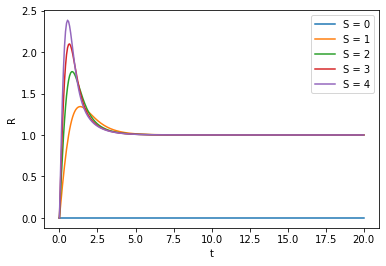

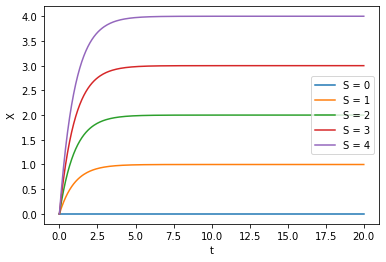

In [32]:
t_values = np.linspace(0, 20, 300)
S_values = range(5)
concentrations = []

for S in S_values:
    concentrations.append(odeint(system, y0 = [0, 0], t = t_values, args = (S, k1, k2, k3, k4)).transpose())

plt.plot(t_values, np.array(concentrations)[:, 0].T, label=f"S = {S}")
plt.xlabel("t")
plt.ylabel("R")
plt.legend([f"S = {S}" for S in S_values])
plt.show()

plt.plot(t_values, np.array(concentrations)[:, 1].T, label=f"S = {S}")
plt.xlabel("t")
plt.ylabel("X")
plt.legend([f"S = {S}" for S in S_values])
plt.show()

In [59]:
def G(u, v, J, K):
    # Goldbeter-Koshland function
    
    return (2*u*K) / (v - u + v*J + u*K + ((v - u + v*J + u*K)**2 - 4*(v - u)*u*K)**0.5)

class Feedback:
    def rate_different_S(self, S_values, t_max):
        t_values = np.linspace(0, t_max, 100)

        for S in S_values:
            R0 = 1 #self.equilibriumR(S)

            rate = odeint(self.dRdt, y0 = R0, t = t_values, args = (S,)).transpose()[0]
            plt.plot(t_values, rate, label=f"S = {S}")

        plt.xlabel("t")
        plt.ylabel("R")
        plt.legend()
        plt.show()
        
class Homeostasis(Feedback):
    def __init__(self, k0, k2, k3, k4, J3, J4):
        self.k0, self.k2, self.k3, self.k4, self.J3, self.J4 = k0, k2, k3, k4, J3, J4
        
    def E(self, R):
        return G(self.k3, self.k4*R, self.J3, self.J4)
    
    def dRdt(self, R, t, S):
        return self.k0*self.E(R) - self.k2*S*R
    
#     def equilibriumR(self, S):

class MutualInhibition(Feedback):
    def __init__(self, k0, k1, k2, k2prime, k3, k4, J3, J4):  
        self.k0, self.k1, self.k2, self.k2prime, self.k3, self.k4, self.J3, self.J4 = k0, k1, k2, k2prime, k3, k4, J3, J4
        
    def E(self, R):
        return G(self.k3, self.k4*R, self.J3, self.J4)
    
    def dRdt(self, R, t, S):
        return self.k0 + self.k1*S - self.k2*R - self.k2prime*self.E(R)*R

#     def equilibriumR(self, S):

class MutualActivation(Feedback):
    def __init__(self, k0, k1, k2, k3, k4, J3, J4):
        self.k0, self.k1, self.k2, self.k3, self.k4, self.J3, self.J4 = k0, k1, k2, k3, k4, J3, J4
    
    def E(self, R):
        return G(self.k3*R, self.k4, self.J3, self.J4)
    
    def dRdt(self, R, t, S):
        return self.k0*self.E(R) + self.k1*S - self.k2*R

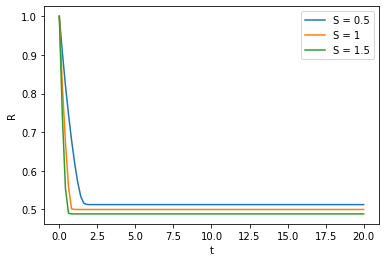

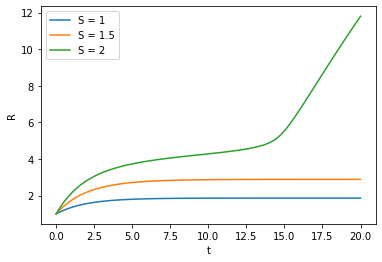

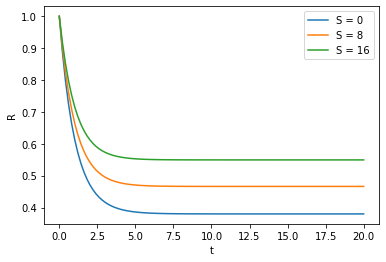

In [61]:
Homeostasis(k0=1,k2=1,k3=0.5,k4=1,J3=0.01,J4=0.01).rate_different_S((0.5,1,1.5), 20)
MutualInhibition(k0=0,k1=1,k2=0.05,k2prime=0.5,k3=1,k4=0.2,J3=0.05,J4=0.05).rate_different_S((1,1.5,2), 20)
MutualActivation(k0=0.4,k1=0.01,k2=1,k3=1,k4=0.2,J3=0.05,J4=0.05).rate_different_S((0,8,16), 20)